In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
wine = load_wine()

In [3]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [5]:
import pandas as pd
newdata=pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
newdata.columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'
  ,'class']
newdata.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
###行拼接演示
import pandas as pd
X1=pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=0)

In [8]:
#划分训练集、测试集
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.3)

In [9]:
Xtrain.shape

(124, 13)

In [10]:
Xtest.shape

(54, 13)

In [11]:
wine.data.shape

(178, 13)

In [12]:
#生成模型
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(Xtrain,Ytrain)
score=clf.score(Xtrain,Ytrain)
score1=clf.score(Xtest,Ytest)

# 结果输出

In [13]:
score

1.0

In [14]:
score1

0.9444444444444444

In [15]:
feature_name=['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

# 画图

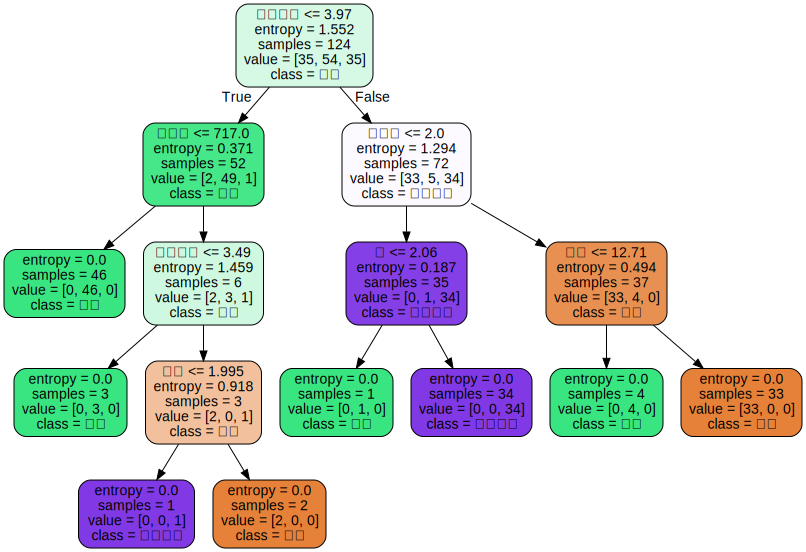

In [16]:
import graphviz
dot_data=tree.export_graphviz(clf
                             ,feature_names=feature_name
                             ,class_names=["琴酒","雪莉","贝尔摩德"]
                             ,filled=True
                             ,rounded=True
                             ,out_file=None
                             )
graph=graphviz.Source(dot_data)
graph

In [15]:
clf.feature_importances_

array([0.        , 0.02836046, 0.        , 0.        , 0.        ,
       0.        , 0.21056774, 0.        , 0.        , 0.32575017,
       0.        , 0.        , 0.43532163])

In [16]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.02836045589290192),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.21056774094150332),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.3257501713851831),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.4353216317804116)]

# 调参

In [19]:
clf=tree.DecisionTreeClassifier(criterion='entropy'
                               ,random_state=40
                               ,splitter='best'
                               #,splitter='random'
                               )
clf.fit(Xtrain,Ytrain)
score=clf.score(Xtrain,Ytrain)
score1=clf.score(Xtest,Ytest)
print(score)
print(score1)

1.0
0.8518518518518519


##### 超参数学习曲线——max_depth

0.8703703703703703


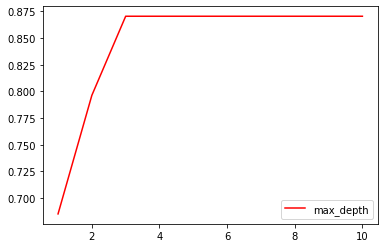

In [24]:
import matplotlib. pyplot as plt 
test=[]
for i in range(10): 
    clf=tree. DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="best"
                                    )
    clf=clf.fit(Xtrain,Ytrain)
    score=clf.score(Xtest,Ytest)
    test.append(score)
print(max(test))
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

0.8888888888888888


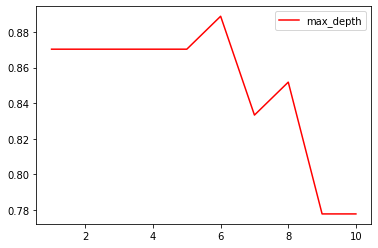

In [32]:
#超参数学习曲线-min_samples_leaf
import matplotlib. pyplot as plt 
test=[]
for i in range(10): 
    clf=tree. DecisionTreeClassifier(max_depth=4
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="best"
                                    ,min_samples_leaf=i+1
                                    )
    #print(i+1)
    clf=clf.fit(Xtrain,Ytrain)
    score=clf.score(Xtest,Ytest)
    test.append(score)
print(max(test))
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

0.8703703703703703


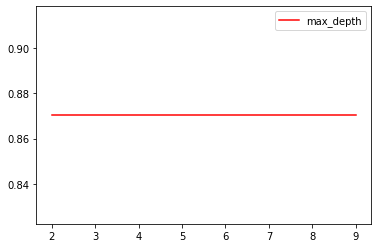

In [33]:
#超参数学习曲线-min_samples_split
import matplotlib. pyplot as plt 
test=[]
for i in range(2,10): 
    clf=tree. DecisionTreeClassifier(max_depth=4
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="best"
                                    ,min_samples_leaf=5
                                    ,min_samples_split=i
                                    )
    #print(i+1)
    clf=clf.fit(Xtrain,Ytrain)
    score=clf.score(Xtest,Ytest)
    test.append(score)
print(max(test))
plt.plot(range(2,10),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [ ]:
#最优组合
import matplotlib. pyplot as plt 
test=[]
for i in range(2,10): 
    clf=tree. DecisionTreeClassifier(max_depth=4
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="best"
                                    ,min_samples_leaf=5
                                    ,min_samples_split=2
                                    )
    #print(i+1)
    clf=clf.fit(Xtrain,Ytrain)
    score=clf.score(Xtest,Ytest)
    test.append(score)
print(max(test))
plt.plot(range(2,10),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [34]:
clf.apply(Xtest)

array([ 5,  2, 10,  2,  2,  7,  7,  2,  4,  2, 10, 10, 10,  2,  7, 10, 10,
        4,  2, 10,  9,  2,  4,  5, 10,  4,  4,  2,  2, 10,  2,  2,  9, 10,
        2,  2,  5,  7, 10,  2, 10,  5,  4,  9,  4,  2,  4,  2,  4,  4,  5,
        4, 10,  5], dtype=int64)

In [35]:
clf.predict(Xtest)

array([1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1,
       2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0,
       2, 1, 2, 1, 2, 2, 1, 2, 0, 1])

# 分类树在合成数集上的表现(没看懂)

In [36]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import make_moons, make_circles, make_classification 
from sklearn.tree import DecisionTreeClassifier

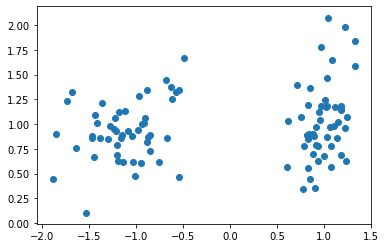

In [37]:
X,y=make_classification(n_samples=100
                        ,n_features=2
                        ,n_redundant=0
                        ,n_informative=2
                        ,random_state=1
                        ,n_clusters_per_class=1
                       )
plt.scatter(X[:,0],X[:,1])

In [38]:
rng = np.random.RandomState(2) #生成一种随机模式
X += 2 * rng.uniform(size=X.shape) #加减0~1之间的随机数
linearly_separable = (X, y) #生成了新的X，依然可以画散点图来观察一下特征的分布
#plt.scatter(X[:,0],X[:,1])
#用make_moons创建月亮型数据，make_circles创建环形数据，并将三组数据打包起来放在列表datasets中
datasets = [make_moons(noise=0.3, random_state=0),
make_circles(noise=0.2, factor=0.5, random_state=1),
linearly_separable]

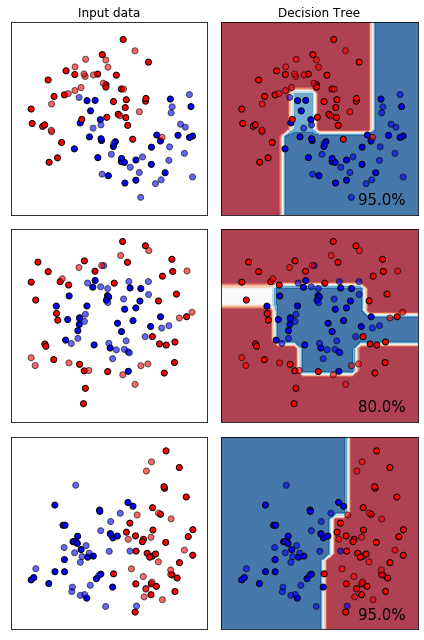

In [43]:
#创建画布，宽高比为6*9
figure = plt.figure(figsize=(6, 9))
#设置用来安排图像显示位置的全局变量i
i = 1
#开始迭代数据，对datasets中的数据进行for循环
for ds_index, ds in enumerate(datasets):
#对X中的数据进行标准化处理，然后分训练集和测试集
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,
    random_state=42)
    #找出数据集中两个特征的最大值和最小值，让最大值+0.5，最小值-0.5，创造一个比两个特征的区间本身更大一点的区间
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    #用特征向量生成网格数据，网格数据，其实就相当于坐标轴上无数个点
    #函数np.arange在给定的两个数之间返回均匀间隔的值，0.2为步长
    #函数meshgrid用以生成网格数据，能够将两个一维数组生成两个二维矩阵。
    #如果第一个数组是narray，维度是n，第二个参数是marray，维度是m。那么生成的第一个二维数组是以narray为行，m行的矩阵，而第二个二维数组是以marray的转置为列，n列的矩阵
    #生成的网格数据，是用来绘制决策边界的，因为绘制决策边界的函数contourf要求输入的两个特征都必须是二维的
    array1,array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
    np.arange(x2_min, x2_max, 0.2))
    #接下来生成彩色画布
    #用ListedColormap为画布创建颜色，#FF0000正红，#0000FF正蓝
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    #在画布上加上一个子图，数据为len(datasets)行，2列，放在位置i上
    ax = plt.subplot(len(datasets), 2, i)
    #到这里为止，已经生成了0~1之间的坐标系3个了，接下来为我们的坐标系放上标题
    #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件
    if ds_index == 0:
        ax.set_title("Input data")
    #将数据集的分布放到我们的坐标系上
    #先放训练集
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
    cmap=cm_bright,edgecolors='k')
    #放测试集
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
    cmap=cm_bright, alpha=0.6,edgecolors='k')
    #为图设置坐标轴的最大值和最小值，并设定没有坐标轴
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    #每次循环之后，改变i的取值让图每次位列不同的位置
    i += 1
    #至此为止，数据集本身的图像已经布置完毕，运行以上的代码，可以看见三个已经处理好的数据集
    #############################从这里开始是决策树模型##########################
    #迭代决策树，首先用subplot增加子图，subplot(行，列，索引)这样的结构，并使用索引i定义图的位置
    #在这里，len(datasets)其实就是3，2是两列
    #在函数最开始，我们定义了i=1，并且在上边建立数据集的图像的时候，已经让i+1,所以i在每次循环中的取值是2，4，6
    ax = plt.subplot(len(datasets),2,i)
    #决策树的建模过程：实例化 → fit训练 → score接口得到预测的准确率
    clf = DecisionTreeClassifier(max_depth=5)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    #绘制决策边界，为此，我们将为网格中的每个点指定一种颜色[x1_min，x1_max] x [x2_min，x2_max]
    #分类树的接口，predict_proba，返回每一个输入的数据点所对应的标签类概率
    #类概率是数据点所在的叶节点中相同类的样本数量/叶节点中的样本总数量
    #由于决策树在训练的时候导入的训练集X_train里面包含两个特征，所以我们在计算类概率的时候，也必须导入结构相同的数组，即是说，必须有两个特征
    #ravel()能够将一个多维数组转换成一维数组
    #np.c_是能够将两个数组组合起来的函数
    #在这里，我们先将两个网格数据降维降维成一维数组，再将两个数组链接变成含有两个特征的数据，再带入决策树模型，生成的Z包含数据的索引和每个样本点对应的类概率，再切片，且出类概率
    Z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:, 1]
    #np.c_[np.array([1,2,3]), np.array([4,5,6])]
    #将返回的类概率作为数据，放到contourf里面绘制去绘制轮廓
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
    #将数据集的分布放到我们的坐标系上
    # 将训练集放到图中去
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
    edgecolors='k')
    # 将测试集放到图中去
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
    edgecolors='k', alpha=0.6)
    #为图设置坐标轴的最大值和最小值
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    #设定坐标轴不显示标尺也不显示数字
    ax.set_xticks(())
    ax.set_yticks(())
    #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件
    if ds_index == 0:
        ax.set_title("Decision Tree")
    #写在右下角的数字
    ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score*100)),
    size=15, horizontalalignment='right')
    #让i继续加一
    i += 1
plt.tight_layout()
plt.show()